In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensile/hardness-tensile data.csv
/kaggle/input/welding-io/Final Output csv.csv
/kaggle/input/test-data-60/final_test_dataset.csv


#### Importing libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from learntools.core import binder
binder.bind(globals())
from learntools import *
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from numpy import absolute
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.metrics import mean_squared_error
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import ExtraTreesClassifier
import warnings
import pandas as pd


#### Reading the dataset

In [3]:
df = pd.read_csv('/kaggle/input/tensile/hardness-tensile data.csv')
df.head()

,Sr. no,specimen number,Voltage,distance,Gas flow rate,Hardness Test HBR Number,Tensile Test Mpa,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,43 58,25.0,1.0,5.0,75.10,356.667,NaN,NaN,NaN,NaN
1,2.0,56 57,30.0,0.0,5.0,54.95,255.139,NaN,NaN,NaN,NaN
2,3.0,55 54,35.0,0.0,5.0,72.75,250.694,NaN,NaN,NaN,NaN
3,4.0,51 53,40.0,1.0,5.0,69.60,201.528,NaN,NaN,NaN,NaN
4,5.0,45 44,20.0,0.0,5.0,60.95,295.278,NaN,NaN,NaN,NaN


#### Seperating input and output parameters into 2 different datasets

In [4]:
x1=df[['Voltage ', 'distance','Gas flow rate']]
x=x1.dropna()

y1=df[['Hardness Test HBR Number', 'Tensile Test Mpa']]
y=y1.dropna()

In [5]:
n_inputs = x.shape[1]
n_outputs = y.shape[1]

#### Splitting the dataset for training and testing & showcasing training dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.03, random_state=0)
X_train

,Voltage,distance,Gas flow rate
6,30.0,1.0,10.0
8,40.0,1.0,10.0
9,25.0,2.0,15.0
13,30.0,2.0,20.0
4,20.0,0.0,5.0
2,35.0,0.0,5.0
14,35.0,2.0,20.0
10,30.0,0.0,15.0
7,35.0,0.0,10.0
15,40.0,0.0,20.0


#### Defining parameters and their respective range for Random Forest Regression

In [7]:
n_estimators = [90,120,140] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [3, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

#### Calling and storing Random Forest Regression model

In [8]:
rf = RandomForestRegressor()

#### Performing randomised search for getting possible parameters

In [9]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=90, n_jobs = -1)

#### Fitting the model over all the possible parameters

In [10]:
rf_random.fit(x, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=140; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=90; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=120; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=140;

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [3, 6, 10],
                                        'n_estimators': [90, 120, 140]},
                   random_state=90, verbose=2)

#### Out of all parameters over which the model was run, sorting to get the best parameters

In [11]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [90, 120, 140], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [3, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 140, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}  



#### Defining the model to run over the best paramaters obtained

In [12]:
m1 = RandomForestRegressor(n_estimators= 90, min_samples_split= 3, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 100, bootstrap= False)
# define the direct multioutput wrapper model
m2 = MultiOutputRegressor(m1)

#### Fit the model over best parameter

In [13]:
m2.fit(x,y)

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=False,
                                                     max_depth=100,
                                                     max_features='sqrt',
                                                     min_samples_split=3,
                                                     n_estimators=90))

#### Getting the output for the Training dataset

In [14]:
y_pred= m2.predict(x)
y_pred

array([[ 72.7925    , 311.75103333],
       [ 59.55222222, 265.35962778],
       [ 72.34888889, 246.01514444],
       [ 64.01      , 228.16913333],
       [ 60.27888889, 298.54420556],
       [ 62.53      , 228.41997222],
       [ 63.18972222, 281.76935556],
       [ 73.62722222, 244.61004444],
       [ 55.89861111, 198.35873333],
       [ 65.29972222, 222.86913333],
       [ 67.72611111, 291.00576111],
       [ 70.66361111, 207.71383889],
       [ 71.14861111, 198.64361111],
       [ 59.13277778, 253.49435   ],
       [ 54.27833333, 259.21259444],
       [ 60.72277778, 261.70446111]])

#### Evaluating model and collecting scores

In [15]:
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None)
# evaluate the model and collect the scores
cv

RepeatedKFold(n_repeats=10, n_splits=10, random_state=None)

#### Getting scores for model

In [16]:
n_scores = cross_val_score(m2, x, y_pred, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 14.098 (6.528)


#### Accuracy analysis of model by comparing original and obtained result

In [17]:
errors = abs(y_pred - y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: Hardness Test HBR Number     3.07
Tensile Test Mpa            10.95
dtype: float64
Accuracy: Hardness Test HBR Number    94.68
Tensile Test Mpa            95.72
dtype: float64 %.


#### Reading test dataset

In [18]:
test = pd.read_csv('/kaggle/input/test-data-60/final_test_dataset.csv')
test.head()

,Voltage,Distance,Gas Flow Rate
0,15,0,5
1,15,1,5
2,15,2,5
3,15,0,10
4,15,1,10


#### Running the test dataset

In [19]:
y_pred1= m2.predict(test)
y_pred1

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Distance
- Gas Flow Rate
Feature names seen at fit time, yet now missing:
- Gas flow rate
- distance

  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Distance
- Gas Flow Rate
Feature names seen at fit time, yet now missing:
- Gas flow rate
- distance

  warnings.warn(message, FutureWarning)


array([[ 60.27888889, 298.54420556],
       [ 68.39638889, 306.65303333],
       [ 64.27722222, 276.28190556],
       [ 62.80833333, 280.30881667],
       [ 63.92611111, 275.02633333],
       [ 61.94472222, 237.1962    ],
       [ 65.30777778, 289.86992778],
       [ 66.7575    , 259.65298889],
       [ 64.03722222, 231.64536111],
       [ 63.71861111, 284.66162222],
       [ 64.81277778, 265.96785556],
       [ 59.55      , 249.94485556],
       [ 60.27888889, 298.54420556],
       [ 68.39638889, 306.65303333],
       [ 64.27722222, 276.28190556],
       [ 62.80833333, 280.30881667],
       [ 63.92611111, 275.02633333],
       [ 61.94472222, 237.1962    ],
       [ 65.30777778, 289.86992778],
       [ 66.7575    , 259.65298889],
       [ 64.03722222, 231.64536111],
       [ 63.71861111, 284.66162222],
       [ 64.81277778, 265.96785556],
       [ 59.55      , 249.94485556],
       [ 62.8725    , 302.67461667],
       [ 72.7925    , 311.75103333],
       [ 66.33166667, 270.81740556],
 

In [20]:
y_pred1.min()

55.89861111111111

#### Getting final output datasset in a desired schema

In [21]:
final = pd.read_csv('/kaggle/input/welding-io/Final Output csv.csv')
final.head()

,Sr. No,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa
0,1,0,5,15,65.201871,3238.125000,2548.223819,305.786858,60.9500,295.27800
1,2,1,5,15,64.963927,3177.291667,2576.941852,309.233022,69.0155,344.38920
2,3,2,5,15,78.021829,2421.875000,3070.030406,368.403649,63.3755,299.33079
3,4,0,10,15,58.596358,3528.750000,2289.171733,274.700608,63.4955,274.33481
4,5,1,10,15,62.713661,3260.625000,2465.709271,295.885112,64.4115,291.20844


In [22]:
final.drop(['Sr. No'],inplace=True,axis=1)
final.head()

,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa
0,0,5,15,65.201871,3238.125000,2548.223819,305.786858,60.9500,295.27800
1,1,5,15,64.963927,3177.291667,2576.941852,309.233022,69.0155,344.38920
2,2,5,15,78.021829,2421.875000,3070.030406,368.403649,63.3755,299.33079
3,0,10,15,58.596358,3528.750000,2289.171733,274.700608,63.4955,274.33481
4,1,10,15,62.713661,3260.625000,2465.709271,295.885112,64.4115,291.20844


#### Finding the relation of each parameter with one another

In [23]:
corr_matrix = final.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,Distance,Gas Flow Rate,Voltage,weight_of_slag_and spatter_gms,Power (Watt),Length of wire cms,Time to weld in seconds,Hardness Test HBR Number,Tesnile Strength Mpa
Distance,NaN,2.918852e-17,1.601741e-16,0.241361,0.356538,0.247967,0.247967,0.037044,0.373301
Gas Flow Rate,NaN,NaN,8.865446e-17,0.117936,0.049043,0.104980,0.104980,0.046122,0.251059
Voltage,NaN,NaN,NaN,0.822107,0.876676,0.847657,0.847657,0.015683,0.526511


#### Pictorial representation of correlation matrix
Negative sign shows inverse proportion. Darker the color, greater is the impact of a given parameter on the other one

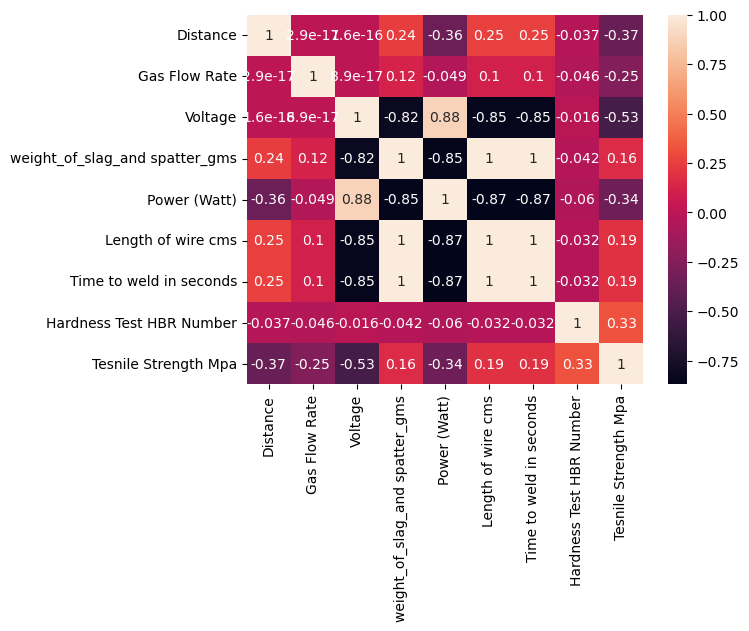

In [24]:
ax = sns.heatmap(final.corr(), annot=True)


## Result of this notebook

##### This notebook can help predict values of Hardness and Tensile Strength of a sample of Mild steel when input parameters for distance, gas flow rate and voltage are provided respectively. 
##### This notebook also tells us the interim relation of output parameters with each of input parameter

##### In order to determine the optimal parameters and get an idea on the operator fatigue , please switch over to "Operator Fatigue" Notebook